<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_11/blob/main/HW_DATA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Bidirectional
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [3]:
models = []

Training RNN model...
Epoch 1/5
69/69 [==============================] - 56s 781ms/step - loss: 0.6890 - accuracy: 0.5437 - val_loss: 0.6723 - val_accuracy: 0.6123
Epoch 2/5
69/69 [==============================] - 50s 728ms/step - loss: 0.5698 - accuracy: 0.7257 - val_loss: 0.4582 - val_accuracy: 0.7856
Epoch 3/5
69/69 [==============================] - 53s 764ms/step - loss: 0.3642 - accuracy: 0.8446 - val_loss: 0.5848 - val_accuracy: 0.6883
Epoch 4/5
69/69 [==============================] - 53s 764ms/step - loss: 0.4341 - accuracy: 0.8094 - val_loss: 0.4746 - val_accuracy: 0.7868
Epoch 5/5
69/69 [==============================] - 55s 804ms/step - loss: 0.2879 - accuracy: 0.8861 - val_loss: 0.4031 - val_accuracy: 0.8383


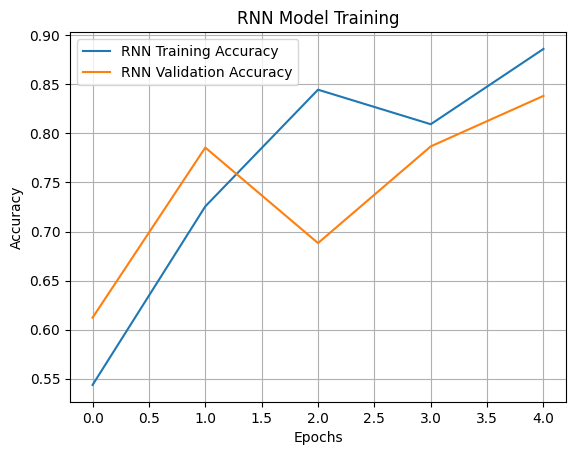

In [10]:
# Проста рекурентна нейронна мережа (RNN)
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))

# Тренування моделі RNN зі зміненими параметрами
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training RNN model...")
history_rnn = model_rnn.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі RNN
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Прогнозування з використанням навченої моделі RNN:
predictions_rnn = model_rnn.predict(input_test)

binary_predictions_rnn = [1 if pred > 0.5 else 0 for pred in predictions_rnn]

for i in range(10):
    print(f"Прогнозоване RNN: {binary_predictions_rnn[i]}, Фактичне: {y_test[i]}")

# Оцінка моделі RNN
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(input_test, y_test)
print('Test Loss RNN: {}'.format(test_loss_rnn))
print('Test Accuracy RNN: {}'.format(test_acc_rnn))


782/782 [==============================] - 28s 36ms/step
Прогнозоване RNN: 0, Фактичне: 0
Прогнозоване RNN: 1, Фактичне: 1
Прогнозоване RNN: 1, Фактичне: 1
Прогнозоване RNN: 1, Фактичне: 0
Прогнозоване RNN: 1, Фактичне: 1
Прогнозоване RNN: 0, Фактичне: 1
Прогнозоване RNN: 1, Фактичне: 1
Прогнозоване RNN: 0, Фактичне: 0
Прогнозоване RNN: 1, Фактичне: 0
Прогнозоване RNN: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.4015 - accuracy: 0.8364
Test Loss RNN: 0.4014618992805481
Test Accuracy RNN: 0.8363999724388123


Training LSTM model...
Epoch 1/5
69/69 [==============================] - 54s 765ms/step - loss: 0.6903 - accuracy: 0.5397 - val_loss: 0.6818 - val_accuracy: 0.5700
Epoch 2/5
69/69 [==============================] - 49s 714ms/step - loss: 0.6423 - accuracy: 0.6614 - val_loss: 0.6396 - val_accuracy: 0.6356
Epoch 3/5
69/69 [==============================] - 52s 763ms/step - loss: 0.5123 - accuracy: 0.7656 - val_loss: 0.5516 - val_accuracy: 0.7101
Epoch 4/5
69/69 [==============================] - 53s 769ms/step - loss: 0.2763 - accuracy: 0.8888 - val_loss: 0.4638 - val_accuracy: 0.7924
Epoch 5/5
69/69 [==============================] - 53s 774ms/step - loss: 0.1337 - accuracy: 0.9563 - val_loss: 0.4670 - val_accuracy: 0.8167


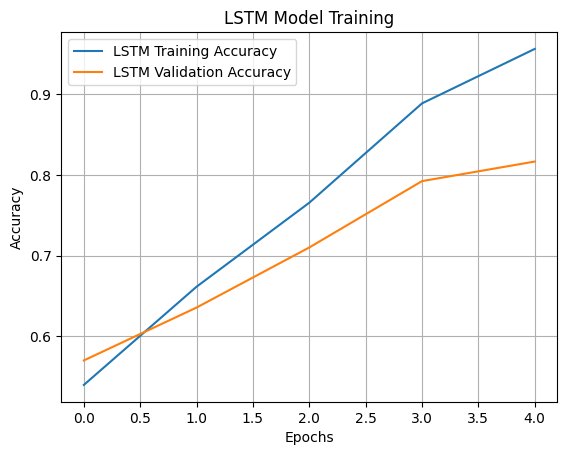

In [12]:
# LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(SimpleRNN(100))
model_lstm.add(Dense(1, activation='sigmoid'))

models.append(('LSTM', model_lstm))

# Тренування моделі LSTM
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training LSTM model...")
history_lstm = model_lstm.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі LSTM
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Прогнозування з використанням навченої моделі LSTM:
predictions_lstm = model_lstm.predict(input_test)
binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]

for i in range(10):
    print(f"Прогнозоване LSTM: {binary_predictions_lstm[i]}, Фактичне: {y_test[i]}")

# Оцінка моделі LSTM
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
print('Test Loss LSTM: {}'.format(test_loss_lstm))
print('Test Accuracy LSTM: {}'.format(test_acc_lstm))


782/782 [==============================] - 30s 38ms/step
Прогнозоване LSTM: 0, Фактичне: 0
Прогнозоване LSTM: 1, Фактичне: 1
Прогнозоване LSTM: 0, Фактичне: 1
Прогнозоване LSTM: 0, Фактичне: 0
Прогнозоване LSTM: 1, Фактичне: 1
Прогнозоване LSTM: 0, Фактичне: 1
Прогнозоване LSTM: 1, Фактичне: 1
Прогнозоване LSTM: 0, Фактичне: 0
Прогнозоване LSTM: 1, Фактичне: 0
Прогнозоване LSTM: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.4662 - accuracy: 0.8123
Test Loss LSTM: 0.466227650642395
Test Accuracy LSTM: 0.8123199939727783


Training Bi-LSTM model...
Epoch 1/5
69/69 [==============================] - 263s 4s/step - loss: 0.6797 - accuracy: 0.6232 - val_loss: 0.6499 - val_accuracy: 0.7084
Epoch 2/5
69/69 [==============================] - 253s 4s/step - loss: 0.4968 - accuracy: 0.7884 - val_loss: 0.3673 - val_accuracy: 0.8465
Epoch 3/5
69/69 [==============================] - 246s 4s/step - loss: 0.2897 - accuracy: 0.8831 - val_loss: 0.3124 - val_accuracy: 0.8720
Epoch 4/5
69/69 [==============================] - 255s 4s/step - loss: 0.2058 - accuracy: 0.9256 - val_loss: 0.2857 - val_accuracy: 0.8879
Epoch 5/5
69/69 [==============================] - 254s 4s/step - loss: 0.1528 - accuracy: 0.9486 - val_loss: 0.3020 - val_accuracy: 0.8887


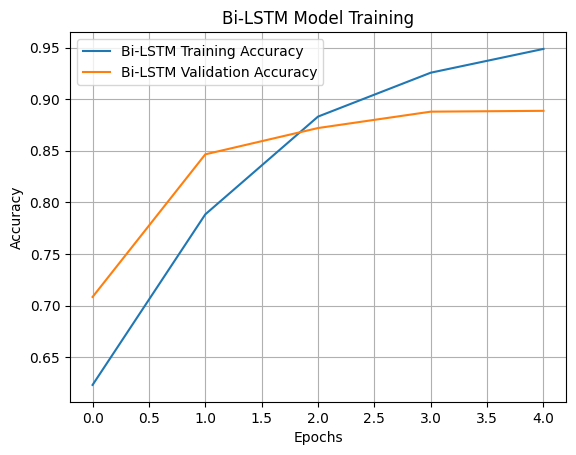

In [14]:
# Двостороння LSTM
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 32))
model_bilstm.add(Bidirectional(LSTM(100)))
model_bilstm.add(Dense(1, activation='sigmoid'))
models.append(('Bi-LSTM', model_bilstm))

# Тренування моделі Bi-LSTM
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training Bi-LSTM model...")
history_bilstm = model_bilstm.fit(input_test, y_test, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі Bi-LSTM
plt.plot(history_bilstm.history['accuracy'], label='Bi-LSTM Training Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Bi-LSTM Validation Accuracy')
plt.title('Bi-LSTM Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Прогнозування з використанням навченої моделі Bi-LSTM:
predictions_bilstm = model_bilstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_bilstm = [1 if pred > 0.5 else 0 for pred in predictions_bilstm]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване Bi-LSTM: {binary_predictions_bilstm[i]}, Фактичне: {y_test[i]}")

# Оцінка моделі Bi-LSTM
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(input_test, y_test)
print('Test Loss Bi-LSTM: {}'.format(test_loss_bilstm))
print('Test Accuracy Bi-LSTM: {}'.format(test_acc_bilstm))


782/782 [==============================] - 130s 165ms/step
Прогнозоване Bi-LSTM: 0, Фактичне: 0
Прогнозоване Bi-LSTM: 1, Фактичне: 1
Прогнозоване Bi-LSTM: 1, Фактичне: 1
Прогнозоване Bi-LSTM: 0, Фактичне: 0
Прогнозоване Bi-LSTM: 1, Фактичне: 1
Прогнозоване Bi-LSTM: 1, Фактичне: 1
Прогнозоване Bi-LSTM: 1, Фактичне: 1
Прогнозоване Bi-LSTM: 0, Фактичне: 0
Прогнозоване Bi-LSTM: 1, Фактичне: 0
Прогнозоване Bi-LSTM: 1, Фактичне: 1
782/782 [==============================] - 131s 167ms/step - loss: 0.1668 - accuracy: 0.9433
Test Loss Bi-LSTM: 0.1668483167886734
Test Accuracy Bi-LSTM: 0.9433199763298035


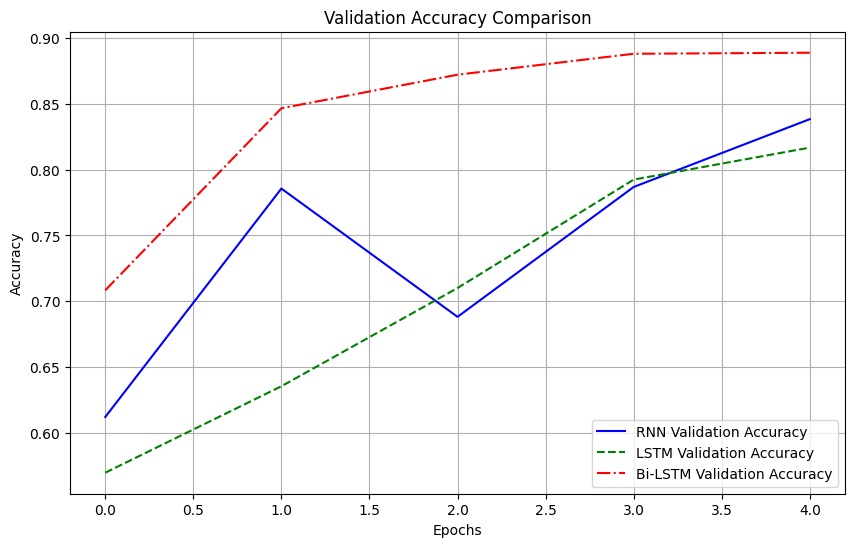

In [16]:
# Побудова графіка для порівняння точності всіх моделей
plt.figure(figsize=(10, 6))

# Додавання графіків для кожної моделі
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy', linestyle='-', color='blue')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', linestyle='--', color='green')
plt.plot(history_bilstm.history['val_accuracy'], label='Bi-LSTM Validation Accuracy', linestyle='-.', color='red')
# plt.plot(history_rnn_conv.history['val_accuracy'], label='RNN with Convolutional Layers Validation Accuracy', linestyle=':', color='purple')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Оцінка моделей на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(input_test, y_test)
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(input_test, y_test)
# test_loss_rnn_conv, test_acc_rnn_conv = model_rnn_conv.evaluate(input_test, y_test)

# Виведення числових показників для порівняння
print("Test Loss & Accuracy Comparison:")
print("RNN: Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss_rnn, test_acc_rnn))
print("LSTM: Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss_lstm, test_acc_lstm))
print("Bi-LSTM: Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss_bilstm, test_acc_bilstm))
# print("RNN with Convolutional Layers: Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss_rnn_conv, test_acc_rnn_conv))


782/782 [==============================] - 132s 168ms/step - loss: 0.1668 - accuracy: 0.9433
Test Loss & Accuracy Comparison:
RNN: Loss = 0.4015, Accuracy = 0.8364
LSTM: Loss = 0.4662, Accuracy = 0.8123
Bi-LSTM: Loss = 0.1668, Accuracy = 0.9433


Training RNN with Convolutional Layers model...
Epoch 1/5
69/69 [==============================] - 36s 492ms/step - loss: 0.6954 - accuracy: 0.5164 - val_loss: 0.6810 - val_accuracy: 0.5861
Epoch 2/5
69/69 [==============================] - 34s 496ms/step - loss: 0.4911 - accuracy: 0.7678 - val_loss: 0.3491 - val_accuracy: 0.8532
Epoch 3/5
69/69 [==============================] - 35s 514ms/step - loss: 0.2388 - accuracy: 0.9066 - val_loss: 0.3105 - val_accuracy: 0.8697
Epoch 4/5
69/69 [==============================] - 34s 494ms/step - loss: 0.1650 - accuracy: 0.9427 - val_loss: 0.3832 - val_accuracy: 0.8439
Epoch 5/5
69/69 [==============================] - 35s 514ms/step - loss: 0.1082 - accuracy: 0.9631 - val_loss: 0.3793 - val_accuracy: 0.8611


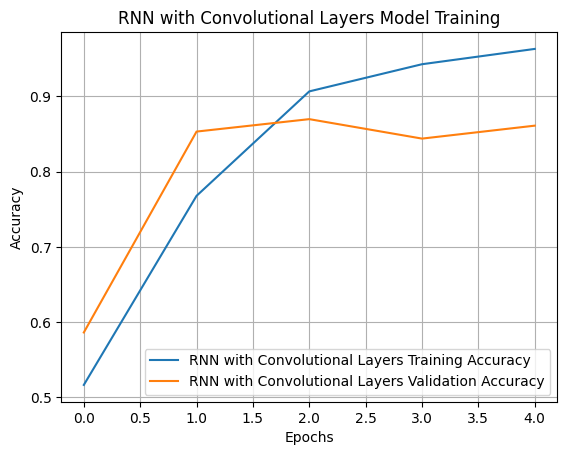

In [20]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

# Побудова моделі RNN з додаванням згорткових шарів та Dropout
model_rnn_conv = Sequential()
model_rnn_conv.add(Embedding(max_features, 32))
model_rnn_conv.add(Conv1D(64, 5, activation='relu'))
model_rnn_conv.add(MaxPooling1D(5))
model_rnn_conv.add(SimpleRNN(100))
model_rnn_conv.add(Dropout(0.5))
model_rnn_conv.add(Dense(1, activation='sigmoid'))

# Компіляція моделі RNN зі зміненими параметрами
model_rnn_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training RNN with Convolutional Layers model...")
history_rnn_conv = model_rnn_conv.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі RNN з додаванням згорткових шарів та Dropout
plt.plot(history_rnn_conv.history['accuracy'], label='RNN with Convolutional Layers Training Accuracy')
plt.plot(history_rnn_conv.history['val_accuracy'], label='RNN with Convolutional Layers Validation Accuracy')
plt.title('RNN with Convolutional Layers Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training LSTM with Convolutional Layers model...
Epoch 1/5
69/69 [==============================] - 70s 983ms/step - loss: 0.6119 - accuracy: 0.6328 - val_loss: 0.3564 - val_accuracy: 0.8525
Epoch 2/5
69/69 [==============================] - 51s 736ms/step - loss: 0.2742 - accuracy: 0.8917 - val_loss: 0.2763 - val_accuracy: 0.8851
Epoch 3/5
69/69 [==============================] - 55s 802ms/step - loss: 0.1702 - accuracy: 0.9409 - val_loss: 0.2872 - val_accuracy: 0.8823
Epoch 4/5
69/69 [==============================] - 57s 829ms/step - loss: 0.1243 - accuracy: 0.9604 - val_loss: 0.3651 - val_accuracy: 0.8819
Epoch 5/5
69/69 [==============================] - 53s 765ms/step - loss: 0.0791 - accuracy: 0.9767 - val_loss: 0.3672 - val_accuracy: 0.8741


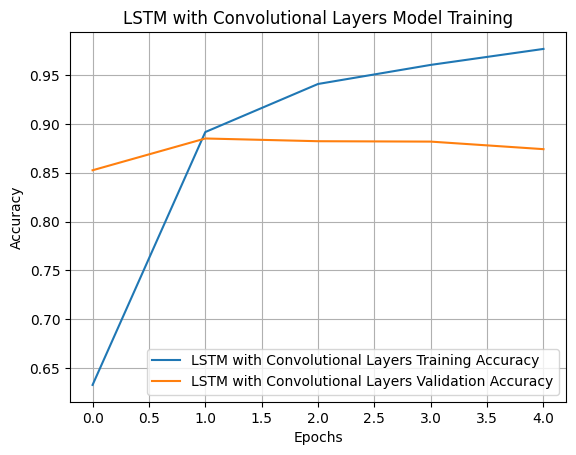

In [6]:
# LSTM з додаванням згорткових шарів та dropout
model_lstm_conv = Sequential()
model_lstm_conv.add(Embedding(max_features, 32))
model_lstm_conv.add(Conv1D(64, 5, activation='relu'))
model_lstm_conv.add(MaxPooling1D(5))
model_lstm_conv.add(LSTM(100))
model_lstm_conv.add(Dropout(0.5))
model_lstm_conv.add(Dense(1, activation='sigmoid'))

# Компіляція та тренування моделі LSTM зі згортковими шарами та dropout
model_lstm_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training LSTM with Convolutional Layers model...")
history_lstm_conv = model_lstm_conv.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі LSTM з додаванням згорткових шарів та dropout
plt.plot(history_lstm_conv.history['accuracy'], label='LSTM with Convolutional Layers Training Accuracy')
plt.plot(history_lstm_conv.history['val_accuracy'], label='LSTM with Convolutional Layers Validation Accuracy')
plt.title('LSTM with Convolutional Layers Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training Bi-LSTM with Convolutional Layers model...
Epoch 1/5
69/69 [==============================] - 88s 1s/step - loss: 0.6407 - accuracy: 0.6293 - val_loss: 0.4210 - val_accuracy: 0.8285
Epoch 2/5
69/69 [==============================] - 82s 1s/step - loss: 0.3011 - accuracy: 0.8787 - val_loss: 0.2812 - val_accuracy: 0.8899
Epoch 3/5
69/69 [==============================] - 83s 1s/step - loss: 0.1806 - accuracy: 0.9359 - val_loss: 0.2782 - val_accuracy: 0.8925
Epoch 4/5
69/69 [==============================] - 93s 1s/step - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.3213 - val_accuracy: 0.8849
Epoch 5/5
69/69 [==============================] - 77s 1s/step - loss: 0.0830 - accuracy: 0.9765 - val_loss: 0.3896 - val_accuracy: 0.8739


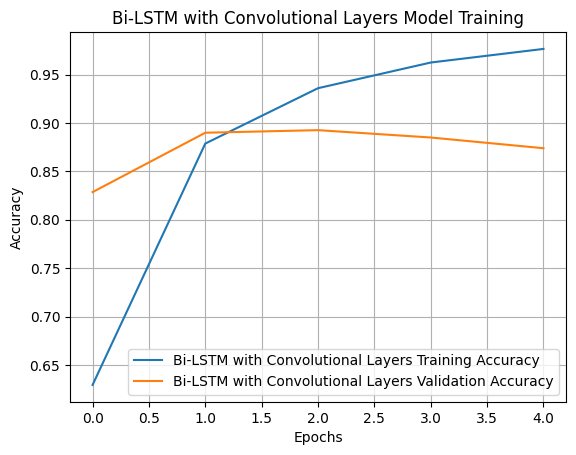

In [7]:
# Bi-LSTM з додаванням згорткових шарів та dropout
model_bilstm_conv = Sequential()
model_bilstm_conv.add(Embedding(max_features, 32))
model_bilstm_conv.add(Conv1D(64, 5, activation='relu'))
model_bilstm_conv.add(MaxPooling1D(5))
model_bilstm_conv.add(Bidirectional(LSTM(100)))
model_bilstm_conv.add(Dropout(0.5))
model_bilstm_conv.add(Dense(1, activation='sigmoid'))

# Компіляція та тренування моделі Bi-LSTM зі згортковими шарами та dropout
model_bilstm_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Training Bi-LSTM with Convolutional Layers model...")
history_bilstm_conv = model_bilstm_conv.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)

# Побудова графіка навчання моделі Bi-LSTM з додаванням згорткових шарів та dropout
plt.plot(history_bilstm_conv.history['accuracy'], label='Bi-LSTM with Convolutional Layers Training Accuracy')
plt.plot(history_bilstm_conv.history['val_accuracy'], label='Bi-LSTM with Convolutional Layers Validation Accuracy')
plt.title('Bi-LSTM with Convolutional Layers Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

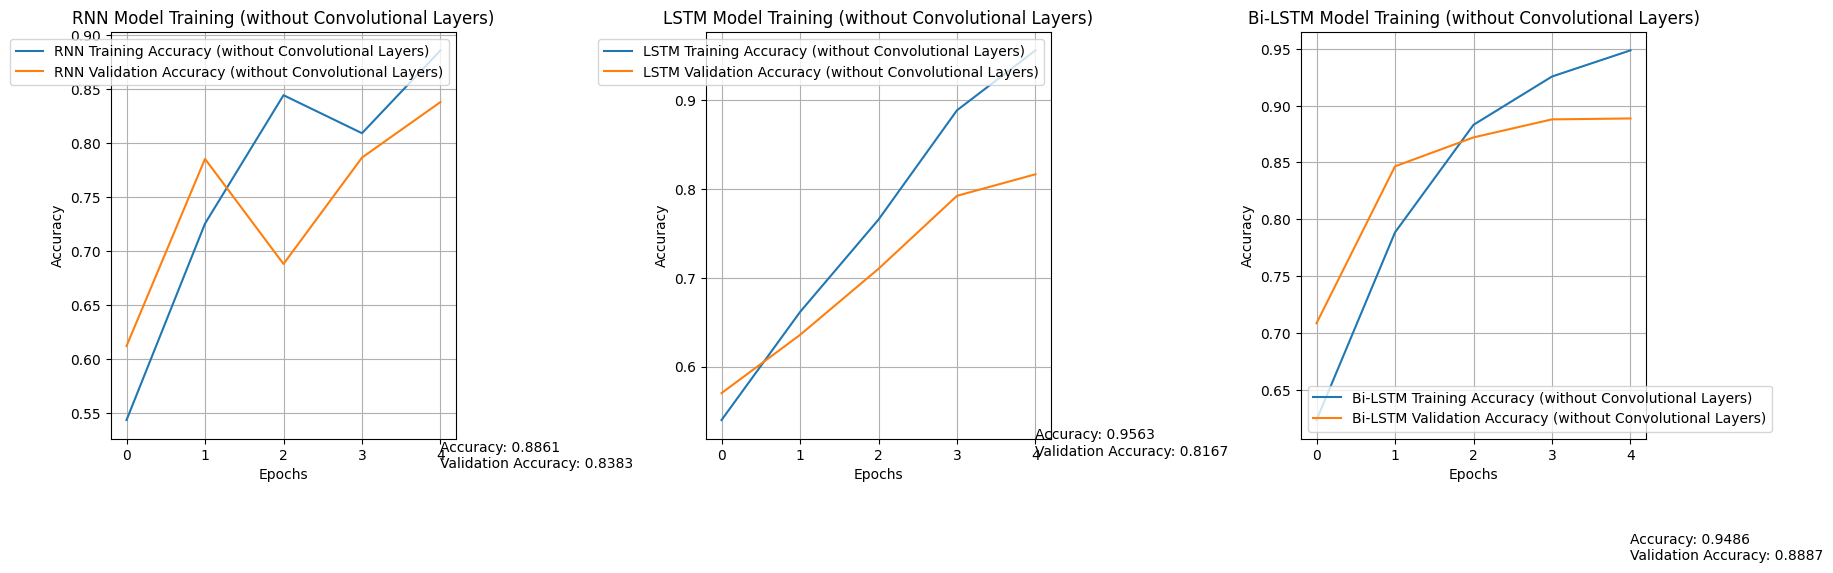

RNN (without Convolutional Layers):
  - Accuracy: 0.8861
  - Validation Accuracy: 0.8383

LSTM (without Convolutional Layers):
  - Accuracy: 0.9563
  - Validation Accuracy: 0.8167

Bi-LSTM (without Convolutional Layers):
  - Accuracy: 0.9486
  - Validation Accuracy: 0.8887


In [33]:
plt.figure(figsize=(18, 6))

# Графіки для без згорткових шарів та dropout
plt.subplot(1, 3, 1)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy (without Convolutional Layers)')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy (without Convolutional Layers)')
plt.title('RNN Model Training (without Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_rnn.history['accuracy'][-1], history_rnn.history['val_accuracy'][-1]), fontsize=10)

plt.subplot(1, 3, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy (without Convolutional Layers)')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy (without Convolutional Layers)')
plt.title('LSTM Model Training (without Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_lstm.history['accuracy'][-1], history_lstm.history['val_accuracy'][-1]), fontsize=10)


plt.subplot(1, 3, 3)
plt.plot(history_bilstm.history['accuracy'], label='Bi-LSTM Training Accuracy (without Convolutional Layers)')
plt.plot(history_bilstm.history['val_accuracy'], label='Bi-LSTM Validation Accuracy (without Convolutional Layers)')
plt.title('Bi-LSTM Model Training (without Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_bilstm.history['accuracy'][-1], history_bilstm.history['val_accuracy'][-1]), fontsize=10)

plt.tight_layout()
plt.show()

# Виведення значень точності та валідаційної точності для кожної моделі
print("RNN (without Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_rnn.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_rnn.history['val_accuracy'][-1]))

print("\nLSTM (without Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_lstm.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_lstm.history['val_accuracy'][-1]))

print("\nBi-LSTM (without Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_bilstm.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_bilstm.history['val_accuracy'][-1]))



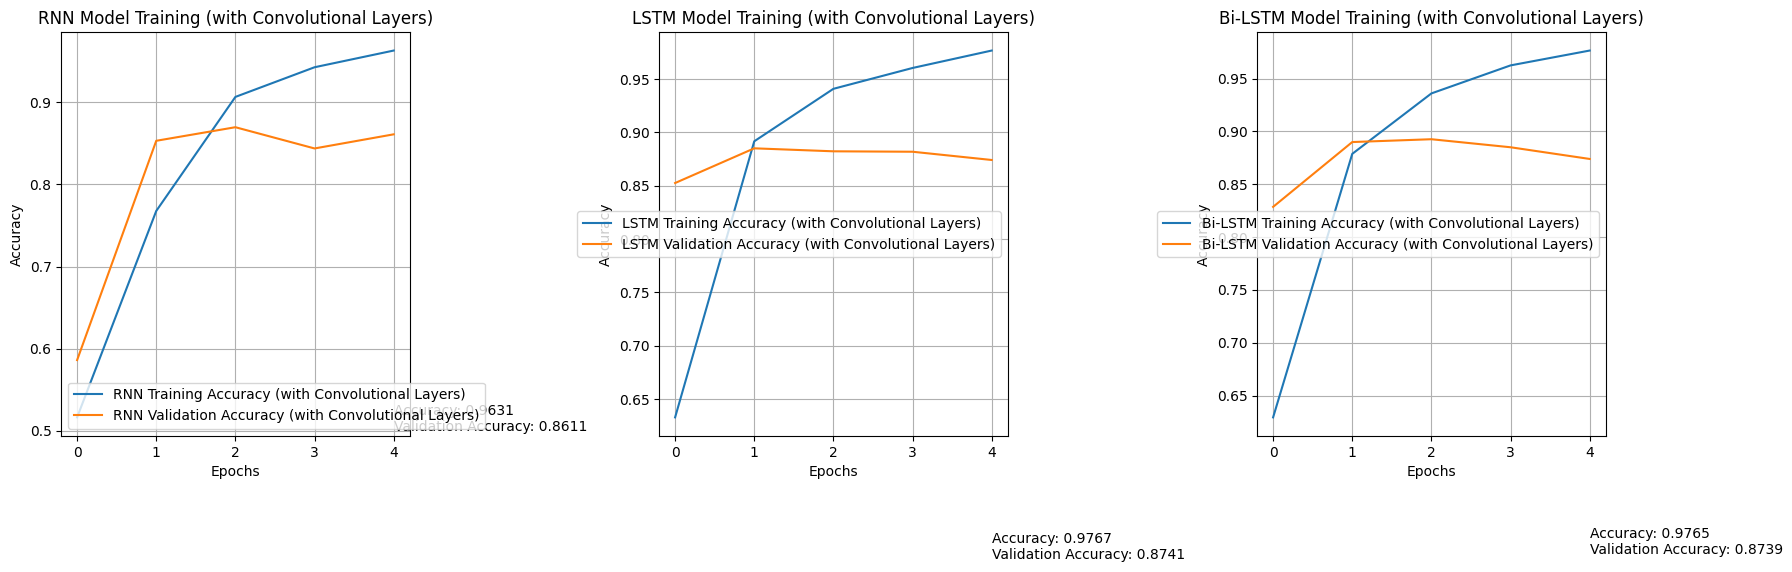

RNN (with Convolutional Layers):
  - Accuracy: 0.9631
  - Validation Accuracy: 0.8611

LSTM (with Convolutional Layers):
  - Accuracy: 0.9767
  - Validation Accuracy: 0.8741

Bi-LSTM (with Convolutional Layers):
  - Accuracy: 0.9765
  - Validation Accuracy: 0.8739


In [32]:
plt.figure(figsize=(18, 6))

# Графіки з додаванням згорткових шарів та dropout
plt.subplot(1, 3, 1)
plt.plot(history_rnn_conv.history['accuracy'], label='RNN Training Accuracy (with Convolutional Layers)')
plt.plot(history_rnn_conv.history['val_accuracy'], label='RNN Validation Accuracy (with Convolutional Layers)')
plt.title('RNN Model Training (with Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_rnn_conv.history['accuracy'][-1], history_rnn_conv.history['val_accuracy'][-1]), fontsize=10)


plt.subplot(1, 3, 2)
plt.plot(history_lstm_conv.history['accuracy'], label='LSTM Training Accuracy (with Convolutional Layers)')
plt.plot(history_lstm_conv.history['val_accuracy'], label='LSTM Validation Accuracy (with Convolutional Layers)')
plt.title('LSTM Model Training (with Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_lstm_conv.history['accuracy'][-1], history_lstm_conv.history['val_accuracy'][-1]), fontsize=10)


plt.subplot(1, 3, 3)
plt.plot(history_bilstm_conv.history['accuracy'], label='Bi-LSTM Training Accuracy (with Convolutional Layers)')
plt.plot(history_bilstm_conv.history['val_accuracy'], label='Bi-LSTM Validation Accuracy (with Convolutional Layers)')
plt.title('Bi-LSTM Model Training (with Convolutional Layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.text(4, 0.5, "Accuracy: {:.4f}\nValidation Accuracy: {:.4f}".format(history_bilstm_conv.history['accuracy'][-1], history_bilstm_conv.history['val_accuracy'][-1]), fontsize=10)

plt.tight_layout()
plt.show()

# Виведення значень точності та валідаційної точності для кожної моделі зі згортковими шарами
print("RNN (with Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_rnn_conv.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_rnn_conv.history['val_accuracy'][-1]))

print("\nLSTM (with Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_lstm_conv.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_lstm_conv.history['val_accuracy'][-1]))

print("\nBi-LSTM (with Convolutional Layers):")
print("  - Accuracy: {:.4f}".format(history_bilstm_conv.history['accuracy'][-1]))
print("  - Validation Accuracy: {:.4f}".format(history_bilstm_conv.history['val_accuracy'][-1]))

Порівнюючи отримані значення точності та валідаційної точності для різних моделей, можна зробити наступні висновки:

* Моделі з використанням згорткових шарів (RNN, LSTM, Bi-LSTM) показують вищу
точність та валідаційну точність порівняно з моделями без згорткових шарів.

* З усіх моделей, LSTM та Bi-LSTM (з та без згорткових шарів) демонструють найкращі результати точності та валідаційної точності.

* Додавання згорткових шарів дозволяє покращити результати моделей RNN та LSTM, але вона має менший вплив на модель Bi-LSTM, яка вже з високими показниками точності.

Отже, якщо метою є максимальна точність, то варто розглянути використання LSTM або Bi-LSTM моделей з додаванням згорткових шарів.